# Lab 3: Exploratory Data Analysis (EDA)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
df = pd.read_csv("amazon_sales_dataset.csv")

In [3]:
df.head()

,order_id,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue
0,1,2022-04-13,2637,Books,128.75,10,4,North America,UPI,3.5,443,115.88,463.52
1,2,2023-03-12,2300,Fashion,302.60,20,5,Asia,Credit Card,3.7,475,242.08,1210.40
2,3,2022-09-28,3670,Sports,495.80,20,2,Europe,UPI,4.4,183,396.64,793.28
3,4,2022-04-17,2522,Books,371.95,15,4,Middle East,UPI,5.0,212,316.16,1264.64
4,5,2022-03-13,1717,Beauty,201.68,0,4,Middle East,UPI,4.6,308,201.68,806.72


In [4]:
print(df.isna())

       order_id  order_date  product_id  product_category  price  \
0         False       False       False             False  False   
1         False       False       False             False  False   
2         False       False       False             False  False   
3         False       False       False             False  False   
4         False       False       False             False  False   
...         ...         ...         ...               ...    ...   
49995     False       False       False             False  False   
49996     False       False       False             False  False   
49997     False       False       False             False  False   
49998     False       False       False             False  False   
49999     False       False       False             False  False   

       discount_percent  quantity_sold  customer_region  payment_method  \
0                 False          False            False           False   
1                 False          

In [5]:
print(df.isna().sum())

order_id            0
order_date          0
product_id          0
product_category    0
price               0
discount_percent    0
quantity_sold       0
customer_region     0
payment_method      0
rating              0
review_count        0
discounted_price    0
total_revenue       0
dtype: int64


In [7]:
df[df.isna().any(axis=1)]

,order_id,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue


In [8]:
#duplicate rows

df.duplicated()[df.duplicated()==True]


Series([], dtype: bool)

In [10]:
df.columns.duplicated().any()


False

In [11]:
df.shape

(50000, 13)

In [12]:
df.dtypes


order_id              int64
order_date           object
product_id            int64
product_category     object
price               float64
discount_percent      int64
quantity_sold         int64
customer_region      object
payment_method       object
rating              float64
review_count          int64
discounted_price    float64
total_revenue       float64
dtype: object

In [13]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [14]:
df.dtypes

order_id                     int64
order_date          datetime64[ns]
product_id                   int64
product_category            object
price                      float64
discount_percent             int64
quantity_sold                int64
customer_region             object
payment_method              object
rating                     float64
review_count                 int64
discounted_price           float64
total_revenue              float64
dtype: object

In [15]:
df.describe()

,order_id,order_date,product_id,price,discount_percent,quantity_sold,rating,review_count,discounted_price,total_revenue
count,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,2022-12-31 10:47:16.800000256,2986.848740,252.507260,13.340700,2.999400,2.996316,249.329280,218.886566,657.331475
min,1.000000,2022-01-01 00:00:00,1000.000000,5.010000,0.000000,1.000000,1.000000,0.000000,3.530000,3.840000
25%,12500.750000,2022-07-02 00:00:00,1983.000000,127.840000,5.000000,2.000000,2.000000,125.000000,109.680000,240.320000
50%,25000.500000,2023-01-02 00:00:00,2983.000000,252.970000,10.000000,3.000000,3.000000,250.000000,215.805000,505.410000
75%,37500.250000,2023-07-02 00:00:00,3989.000000,376.335000,20.000000,4.000000,4.000000,374.000000,322.702500,968.970000
max,50000.000000,2023-12-31 00:00:00,4999.000000,499.990000,30.000000,5.000000,5.000000,499.000000,499.910000,2499.550000
std,14433.901067,NaN,1156.374535,143.025544,9.850694,1.415401,1.154295,144.251981,127.317681,526.223968


In [16]:
df.describe(include='all')

,order_id,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue
count,50000.000000,50000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000
unique,NaN,NaN,NaN,6,NaN,NaN,NaN,4,5,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Beauty,NaN,NaN,NaN,Asia,Wallet,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,8465,NaN,NaN,NaN,12526,10106,NaN,NaN,NaN,NaN
mean,25000.500000,2022-12-31 10:47:16.800000256,2986.848740,NaN,252.507260,13.340700,2.999400,NaN,NaN,2.996316,249.329280,218.886566,657.331475
min,1.000000,2022-01-01 00:00:00,1000.000000,NaN,5.010000,0.000000,1.000000,NaN,NaN,1.000000,0.000000,3.530000,3.840000
25%,12500.750000,2022-07-02 00:00:00,1983.000000,NaN,127.840000,5.000000,2.000000,NaN,NaN,2.000000,125.000000,109.680000,240.320000
50%,25000.500000,2023-01-02 00:00:00,2983.000000,NaN,252.970000,10.000000,3.000000,NaN,NaN,3.000000,250.000000,215.805000,505.410000
75%,37500.250000,2023-07-02 00:00:00,3989.000000,NaN,376.335000,20.000000,4.000000,NaN,NaN,4.000000,374.000000,322.702500,968.970000
max,50000.000000,2023-12-31 00:00:00,4999.000000,NaN,499.990000,30.000000,5.000000,NaN,NaN,5.000000,499.000000,499.910000,2499.550000


In [17]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (50000, 13) 

number of rows:  50000
number of columns:  13


In [20]:
df.columns

Index(['order_id', 'order_date', 'product_id', 'product_category', 'price',
       'discount_percent', 'quantity_sold', 'customer_region',
       'payment_method', 'rating', 'review_count', 'discounted_price',
       'total_revenue'],
      dtype='object')

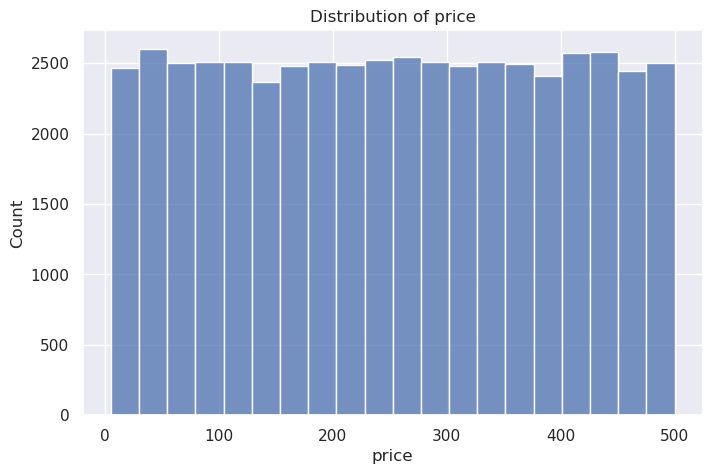

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=20)
plt.title("Distribution of price")
plt.show()

### Analysis:
The price distribution is relatively uniform across the range, indicating that products are offered at diverse price levels without a strong concentration in a specific segment.

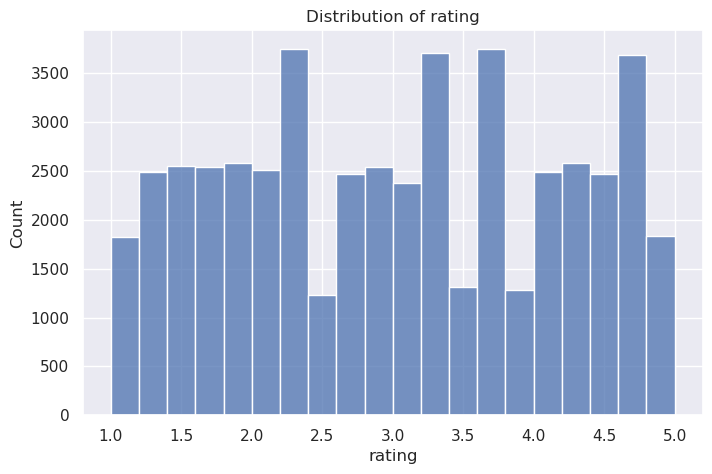

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(df['rating'], bins=20)
plt.title("Distribution of rating")
plt.show()

### Analysis:
Ratings are more concentrated in the higher range (above 3), suggesting overall positive customer satisfaction with relatively fewer low ratings.

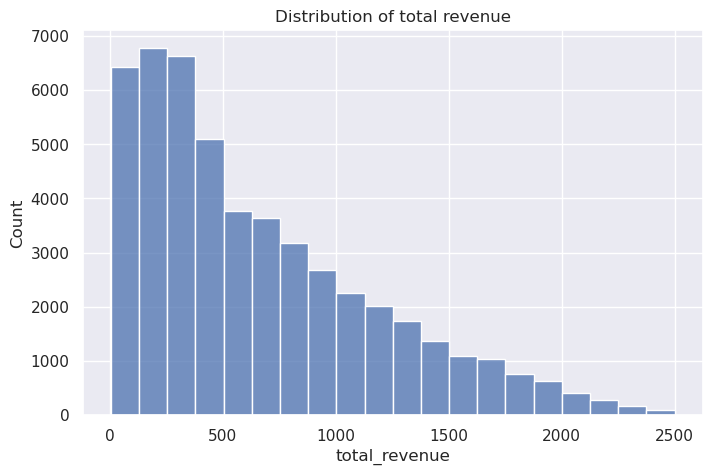

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(df['total_revenue'], bins=20)
plt.title("Distribution of total revenue")
plt.show()

### Analysis:
The distribution of total revenue is right-skewed, meaning most transactions generate lower revenue amounts, while a smaller number of transactions contribute significantly higher revenue.

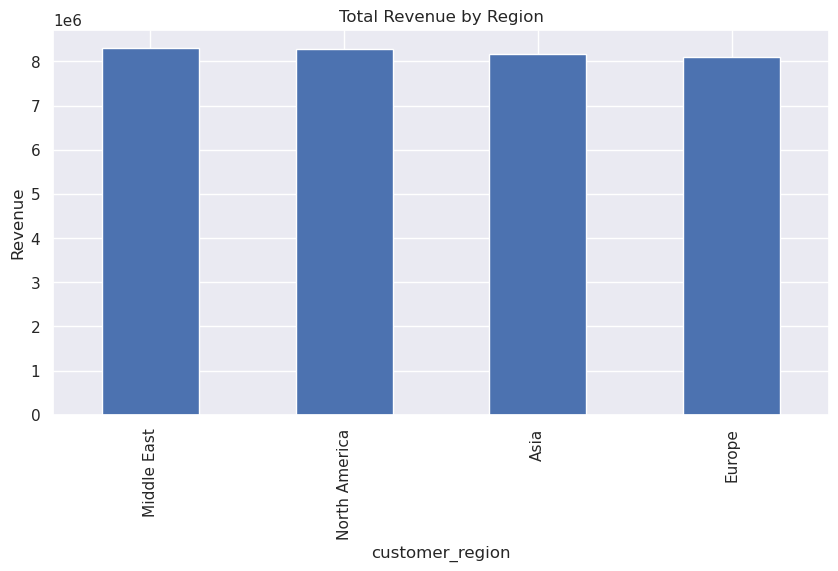

customer_region
Middle East      8301844.50
North America    8277217.84
Asia             8175199.83
Europe           8112311.57
Name: total_revenue, dtype: float64

In [26]:
country_revenue = df.groupby('customer_region')['total_revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
country_revenue.plot(kind='bar')
plt.title("Total Revenue by Region")
plt.ylabel("Revenue")
plt.show()

country_revenue

### Analysis:
Total revenue is relatively consistent across regions, with only minor differences in performance, indicating balanced sales distribution geographically.

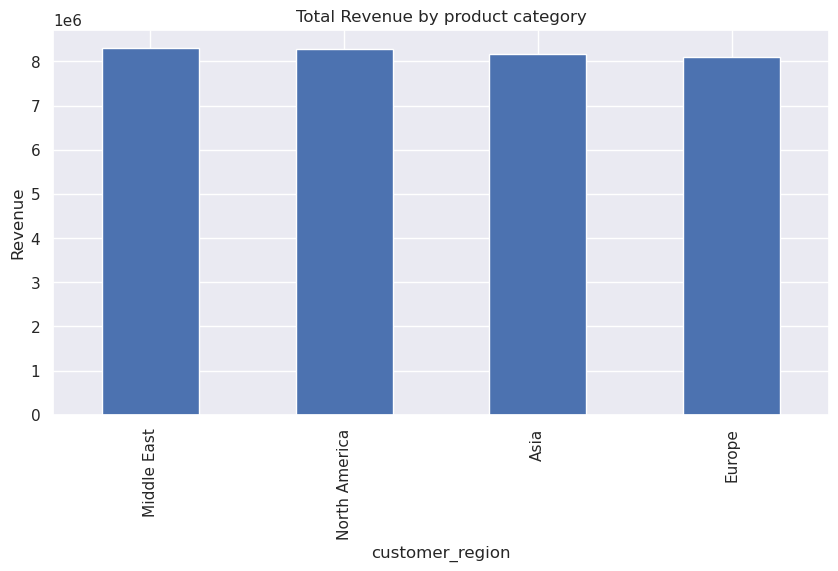

product_category
Beauty            5550624.97
Books             5484863.03
Fashion           5480123.34
Home & Kitchen    5473132.55
Electronics       5470594.03
Sports            5407235.82
Name: total_revenue, dtype: float64

In [27]:
category_revenue = df.groupby('product_category')['total_revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
country_revenue.plot(kind='bar')
plt.title("Total Revenue by product category")
plt.ylabel("Revenue")
plt.show()

category_revenue

### Analysis:
Total revenue is fairly similar across product categories, with slight variations suggesting that no single category overwhelmingly dominates overall sales.


In [28]:
category_revenue = df.groupby('product_category')['total_revenue'].sum().sort_values(ascending=False)

category_revenue.head(10)

product_category
Beauty            5550624.97
Books             5484863.03
Fashion           5480123.34
Home & Kitchen    5473132.55
Electronics       5470594.03
Sports            5407235.82
Name: total_revenue, dtype: float64

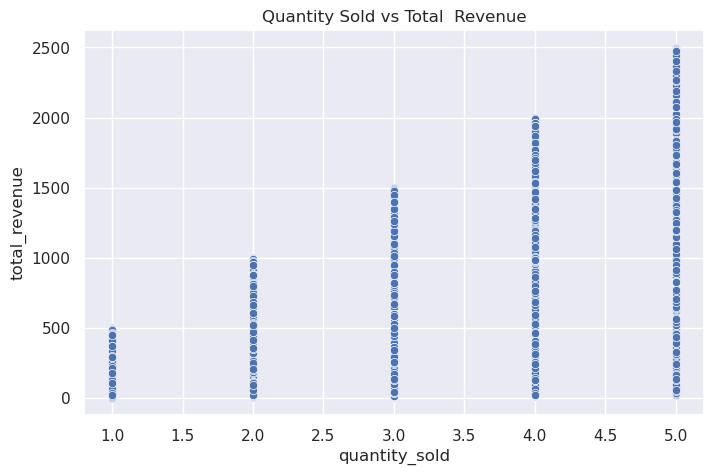

In [30]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='quantity_sold', y='total_revenue', data=df)
plt.title("Quantity Sold vs Total  Revenue")
plt.show()

### Analysis:
There is a clear positive relationship between quantity sold and total revenue, indicating that higher sales volumes directly contribute to increased revenue.

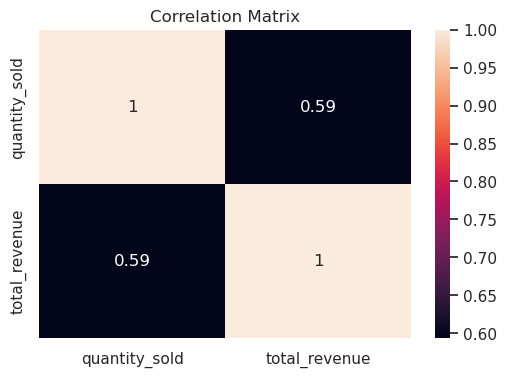

In [31]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['quantity_sold', 'total_revenue']].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

### Analysis:
A moderate positive correlation (0.59) exists between quantity sold and total revenue, indicating that while revenue generally increases with higher quantities sold, other factors may also influence total revenue.

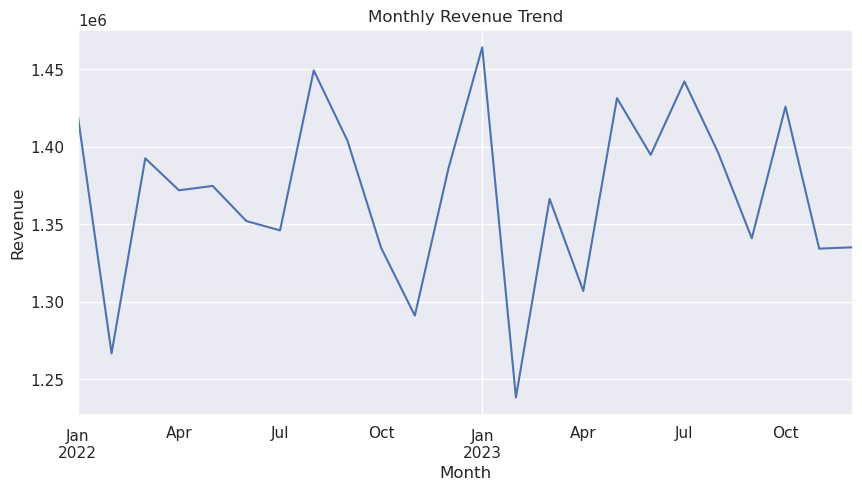

In [32]:
df['Month'] = df['order_date'].dt.to_period('M')

monthly_revenue = df.groupby('Month')['total_revenue'].sum()

plt.figure(figsize=(10,5))
monthly_revenue.plot()
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.show()

### Analysis:
The monthly revenue trend exhibits noticeable fluctuations over time. Although revenue remains relatively stable overall, periodic peaks and declines suggest possible seasonal demand patterns or promotional effects. The absence of a strong long-term upward or downward trend indicates consistent sales performance across the observed period.

## Conclusion

The exploratory data analysis of the Amazon dataset reveals important insights into pricing, customer satisfaction, and revenue performance. Prices are widely distributed across different ranges, while customer ratings are generally concentrated in higher values, indicating positive satisfaction levels.

Revenue distribution is right-skewed, with most transactions generating moderate revenue and fewer transactions contributing higher amounts. Sales performance is relatively consistent across regions and product categories, suggesting balanced market distribution.

Additionally, a moderate positive correlation (0.59) between quantity sold and total revenue confirms that higher sales volumes contribute to increased revenue. 

Overall, this analysis provides a clear understanding of the dataset and establishes a strong foundation for further modeling and business insights.